In [49]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,SGDClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,classification_report,precision_score, f1_score, roc_auc_score
from sklearn.tree import plot_tree
from scipy.stats import mode
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
    

import warnings
warnings.filterwarnings('ignore')

In [28]:
df=pd.read_csv("../data/parkinsons.data")

In [29]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [30]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [31]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [33]:
df.drop(columns=['name', 'MDVP:Jitter(Abs)'], inplace=True)

In [36]:
# Classify columns: categorical columns and numerical columns
cat_cols = [col for col in df.columns if df[col].dtype=='object']
num_cols = [col for col in df.columns if df[col].dtype!='object']

In [37]:
cat_cols,num_cols

([],
 ['MDVP:Fo(Hz)',
  'MDVP:Fhi(Hz)',
  'MDVP:Flo(Hz)',
  'MDVP:Jitter(%)',
  'MDVP:RAP',
  'MDVP:PPQ',
  'Jitter:DDP',
  'MDVP:Shimmer',
  'MDVP:Shimmer(dB)',
  'Shimmer:APQ3',
  'Shimmer:APQ5',
  'MDVP:APQ',
  'Shimmer:DDA',
  'NHR',
  'HNR',
  'status',
  'RPDE',
  'DFA',
  'spread1',
  'spread2',
  'D2',
  'PPE'])

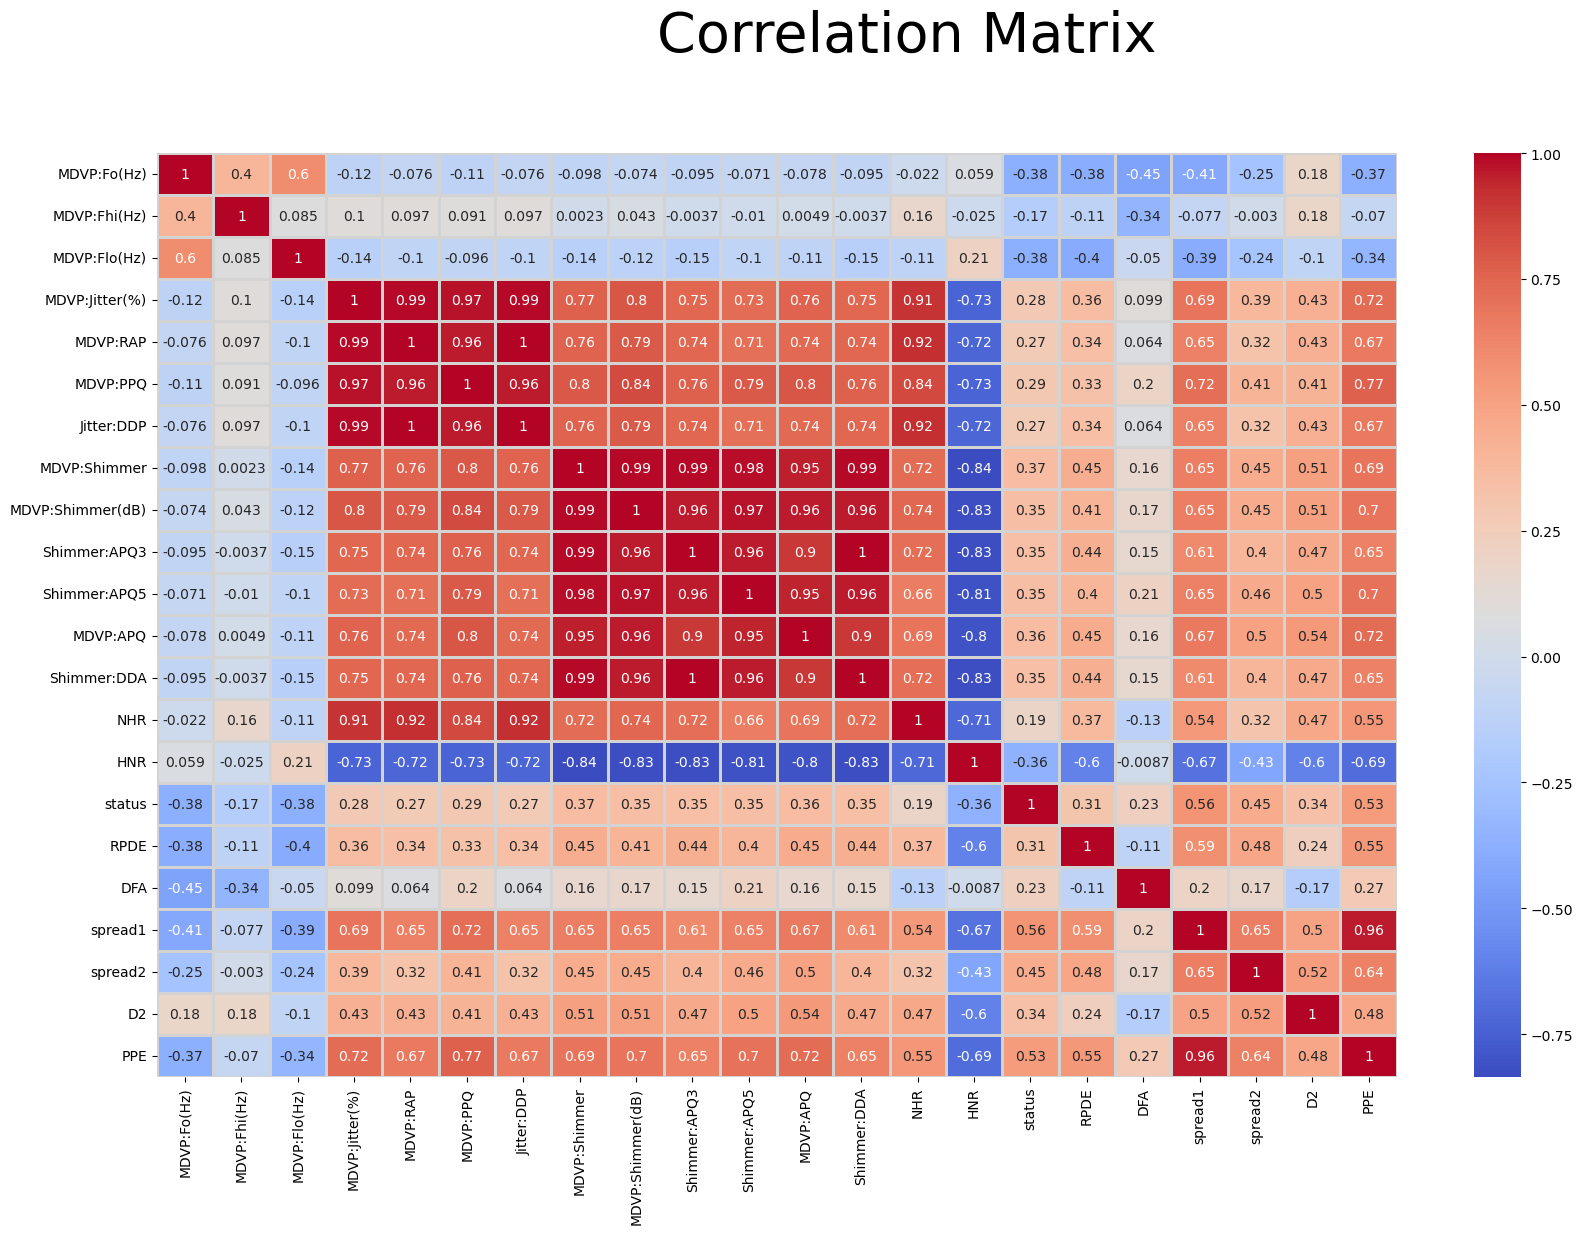

In [38]:
num_df = df[num_cols]

plt.figure(figsize=(20, 12))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', linewidths=2, linecolor='lightgrey')
plt.suptitle('Correlation Matrix', fontsize=40, y=1)
plt.show()

In [ ]:
columns_to_drop = ['MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
                   'NHR', 'MDVP:APQ', 'Shimmer:DDA', 'PPE', 'MDVP:Jitter(Abs)',
                   'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP']
df.drop(columns=[
    col for col in columns_to_drop if col in df.columns],
        inplace=True)

In [42]:
num_cols = [col for col in df.columns if df[col].dtype!='object']

In [43]:
cols = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Shimmer', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2',
       'D2']

In [44]:
# Check the variance inflation factor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add constant term
df_vif = df.copy()
df_vif['const'] = 1

# Select the columns for which VIF needs to be calculated
X = df_vif[num_cols + ['const']]

# Calculate VIF
vif_info = pd.DataFrame()
vif_info['Column'] = X.columns
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info = vif_info.sort_values('VIF', ascending=False)

# Show results
vif_info

,Column,VIF
12,const,1672.575225
5,HNR,6.257077
9,spread1,4.608716
4,MDVP:Shimmer,4.449965
3,MDVP:Jitter(%),3.613030
0,MDVP:Fo(Hz),3.359199
7,RPDE,3.232691
11,D2,2.717530
10,spread2,2.417264
8,DFA,1.997522


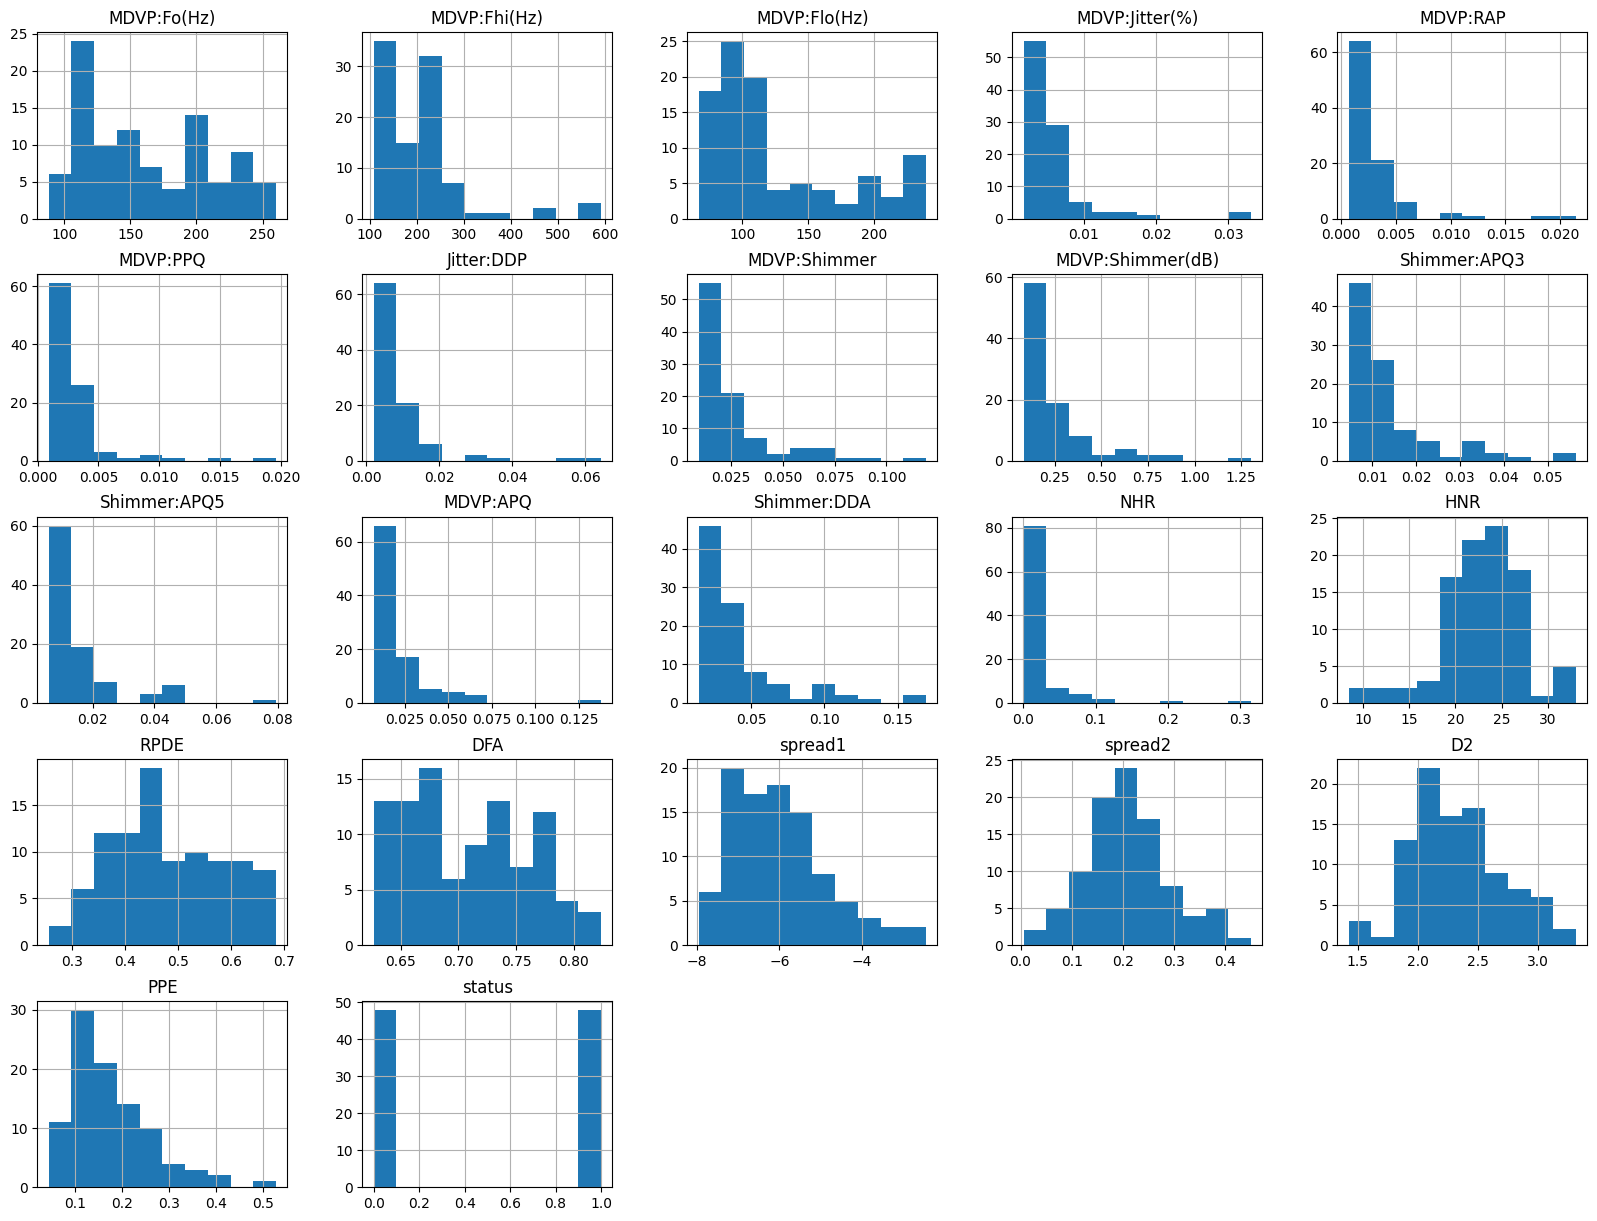

In [297]:
df.hist(figsize=(20,15));

In [75]:
X=df.drop(columns=['status'])
y=df['status']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(97, 11)
(97,)
(98, 11)
(98,)


In [ ]:
# from sklearn.preprocessing import StandardScaler

# # Features normalization
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [50]:
# Dictionary of models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=4),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel="linear", random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "Stochastic Gradient Descent": SGDClassifier(loss="log_loss", random_state=42),
    "CatBoost": CatBoostClassifier(iterations=100, random_state=42, verbose=0)
}

# Store results in a list
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    results.append([name, round(train_score, 4), round(test_score, 4)])

# Convert results to DataFrame and print
df_results = pd.DataFrame(results, columns=["Model", "Train Accuracy", "Test Accuracy"])
df_results.sort_values(by="Test Accuracy", ascending=False, inplace=True)
df_results.reset_index(drop=True, inplace=True)
print(df_results)

                         Model  Train Accuracy  Test Accuracy
0                Random Forest          1.0000         0.9388
1                     CatBoost          0.9794         0.9286
2            Gradient Boosting          1.0000         0.9082
3          K-Nearest Neighbors          0.9485         0.8878
4                      XGBoost          1.0000         0.8878
5       Support Vector Machine          0.8969         0.8673
6  Stochastic Gradient Descent          0.8351         0.8673
7          Logistic Regression          0.8454         0.8469
8                Decision Tree          0.9588         0.8265


In [77]:
#create a basic catboost model
catboost_model = CatBoostClassifier(verbose=0)
catboost_model.fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")
# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")
# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9490
Precision: 0.9375
Recall: 1.0000
F1 Score: 0.9677


In [78]:
#save knn model using pickle
import pickle
import os
save_path = "../model/voicemodel.pkl"
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save the model
with open(save_path, 'wb') as f:
    pickle.dump(catboost_model, f)

print(f"Model saved at: {save_path}")

Model saved at: ../model/voicemodel.pkl


In [69]:
X.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Shimmer', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2'],
      dtype='object')